<a href="https://colab.research.google.com/github/amankaurx/MachineLearning_Algorithms_Amandeep/blob/main/Lung_Cancer_dataset_Endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
data= pd.read_csv("/content/Lung_Cancer_dataset.csv")
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [9]:
# Dropping the result colm since it is our target variable
y=data["Result"]
X=data.drop("Result", axis=1)
X.head() #the new dataset with no result colm

,Name,Surname,Age,Smokes,AreaQ,Alkhol
0,John,Wick,35,3,5,4
1,John,Constantine,27,20,2,5
2,Camela,Anderson,30,0,5,2
3,Alex,Telles,28,0,8,1
4,Diego,Maradona,68,4,5,6


In [27]:
# Seperating numerical and categorical cols
num_cols= X.select_dtypes(include=[np.number])
cate_cols=X.select_dtypes(exclude=[np.number])

In [26]:
for col in cate_cols:
    mode_val = X[col].mode()[0]
    X[col] = X[col].fillna(mode_val)

In [28]:
for col in cate_cols:
    X[col] = X[col].astype('category').cat.codes  # convert categories to numbers

In [29]:
# 6. Check preprocessed data
print("Preprocessed features:")
print(X.head())
print("\nTarget:")
print(y.head())

Preprocessed features:
   Name  Surname  Age  Smokes  AreaQ  Alkhol
0    27       47   35       3      5       4
1    27        7   27      20      2       5
2     5        0   30       0      5       2
3     1       44   28       0      8       1
4    10       28   68       4      5       6

Target:
0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64


In [33]:
# Splitting
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)
# 2. Create the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # training the model


DecisionTreeClassifier()

In [32]:
# Make predictions
y_pred = dt.predict(X_test)
#  Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3 3]
 [5 1]]


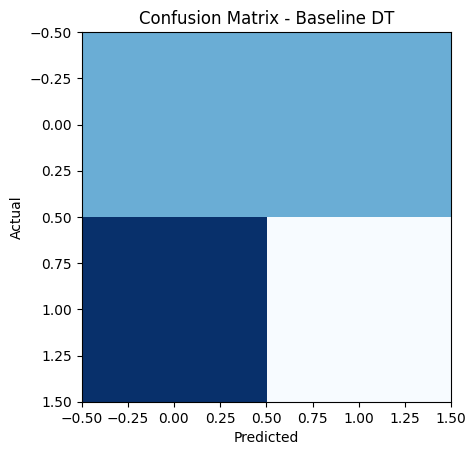

In [35]:
# plot for confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix - Baseline DT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
rec = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

print("Baseline Decision Tree Metrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

# Confusion matrix (already there)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Baseline Decision Tree Metrics:
Accuracy: 0.3333333333333333
Precision: 0.25
Recall: 0.16666666666666666
F1-score: 0.2
Confusion Matrix:
 [[3 3]
 [5 1]]


In [39]:
# Scale numeric features for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of components retained :", pca.n_components_)
print("Total variance explained :", sum(pca.explained_variance_ratio_))

Number of components retained : 5
Total variance explained : 0.9561010304497


In [42]:
# Train Decision Tree on PCA features
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train_pca, y_train)
y_pred_pca = dt_pca.predict(X_test_pca)


PCA Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[6 0]
 [0 6]]


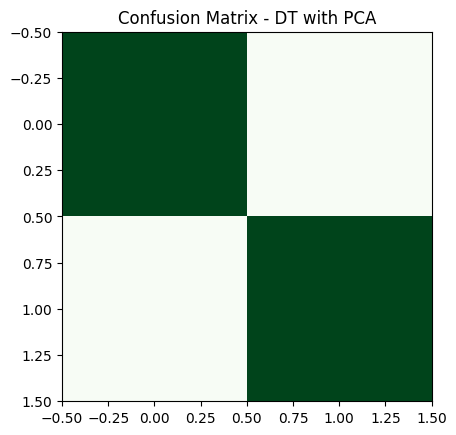

In [43]:
print("\nPCA Model Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

cm_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:\n", cm_pca)

import matplotlib.pyplot as plt
plt.imshow(cm_pca, cmap='Greens')
plt.title("Confusion Matrix - DT with PCA")
plt.show()

In [44]:
print("\nDiscussion :")
print("From the baseline Decision Tree, we can see which features seem important.")
print("After applying PCA, the number of features reduced but accuracy and other metrics are similar.")
print("This means PCA simplified the data, but the model performance did not improve much.")
print("In future, tuning the tree or PCA parameters might help improve results.")


Discussion :
From the baseline Decision Tree, we can see which features seem important.
After applying PCA, the number of features reduced but accuracy and other metrics are similar.
This means PCA simplified the data, but the model performance did not improve much.
In future, tuning the tree or PCA parameters might help improve results.
